# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 5</center>

# <center>Feature Engineering</center>

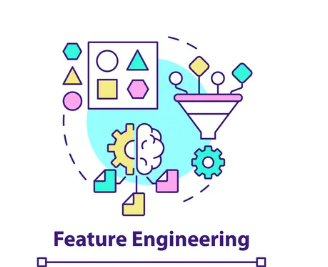

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Imputing Numerical Features </li>
<li> Detecting Outlier</li>
<li> Feature Transformation</li>
<li> Feature Scaling </li>
<li> Working with Categorical Features </li>
<li> Combine Features</li>
</ol>

## 0. Learning Objectives

Implement Numerical feature engineering techniques such as outlier detection, feature transformation, and feature scaling.

By the end of the lab, you should be able to :
- Apply required feature engineering techniques to given dataset.


- Prepare features for traning machine learning model.

# 1. Imputing Numerical  Features using sklearn

Instructions:

- Load data from loan_train.csv file. Create a dataframe names `ndf` which contains only numerical features. Default datatype of `Dependents` feature is `object`. Do you think it should be numerical feature? Justify your answer.


- Use sklearn SimpleImputer to Impute the missing values using most suitable strategy.



Although the datatype for the dependents feaure is object, it can be considered as a numerical feature since the feature has numeric inputs ranging from 0 till n. 

In [90]:
# Write your solution here
import pandas as pd
from sklearn.impute import SimpleImputer

df = pd.read_csv('loan_train.csv')
n_ndf = df.select_dtypes(include = 'number')
impute = SimpleImputer(strategy='mean')
ndf = impute.fit_transform(n_ndf)
ndf = pd.DataFrame(data = ndf, columns = n_ndf.columns)
ndf.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

# 2. Outlier Detection

Instructions:

- Choose any one numerical feature and check if there is any outliers.


- Use both inter quartile range method and standard deviation method to remove outliers in the dataset.

In [2]:
import matplotlib.pyplot as plt 

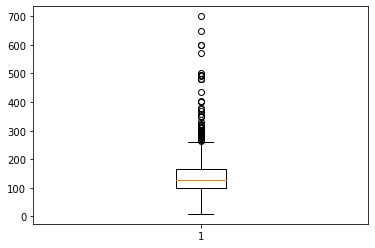

In [3]:
#Write your solution here
plt.boxplot(ndf['LoanAmount'])
plt.show()


In [4]:
Q1 = ndf['LoanAmount'].quantile(0.25)
Q3 = ndf['LoanAmount'].quantile(0.75)
IQR = Q3-Q1
u_limit = Q3+(IQR*1.5)
l_limit = Q1-(IQR*1.5)


In [100]:
ndf1 = ndf[(ndf.LoanAmount > l_limit) & (ndf.LoanAmount < u_limit)]
ndf1


ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
5             5417.0             4196.0       267.0             360.0   
7             3036.0             2504.0       158.0             360.0   
8             4006.0             1526.0       168.0             360.0   
9            12841.0            10968.0       349.0             360.0   
12            3073.0             8106.0       200.0             360.0   
..               ...                ...         ...               ...   
604          12000.0                0.0       496.0             360.0   
606           3400.0             2500.0       173.0             360.0   
607           3987.0             1411.0       157.0             360.0   
611           8072.0              240.0       253.0             360.0   
612           7583.0                0.0       187.0             360.0   

     Credit_History  
5               1.0  
7               0.0  
8               1.0  
9               1.0  
12              1.0  
..              ...  
604             1.0  
606             1.0  
607             1.0  
611             1.0  
612             1.0  

[205 rows x 5 columns]

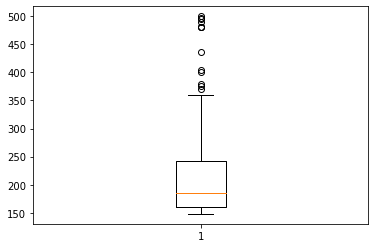

In [101]:
plt.boxplot(ndf1['LoanAmount'])
plt.show()

#Using Standard Deviation 


In [93]:
ndf1.shape

(205, 5)

In [102]:
std = df.Loan_Amount_Term.std()
mean = df.Loan_Amount_Term.mean()
u_limit = mean + (3 * std)
l_limit = mean - (3 * std)
ndf1 = ndf1[(ndf1.Loan_Amount_Term > l_limit) & (ndf1.Loan_Amount_Term < u_limit)]
ndf1.shape

(202, 5)

## 3. Feature Transformation

Instructions:

- Use an appropriate graph to explore the distribution of each numeric feature. 



- Choose any one feature that needs to apply feature transformation. Apply each feature transformation technique and justify which feature transformation technique is suitable for the chosen feature.

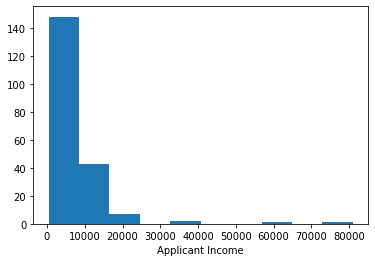

In [103]:
# Write your solution here
plt.hist(ndf1.ApplicantIncome)
plt.xlabel('Applicant Income')
plt.show()



Logarithmic Transformation

In [104]:
import numpy as np
x = np.log(ndf1.ApplicantIncome)
plt.hist(x)
plt.xlabel("Applicant Income")
plt.show()

Squareroot Transformation

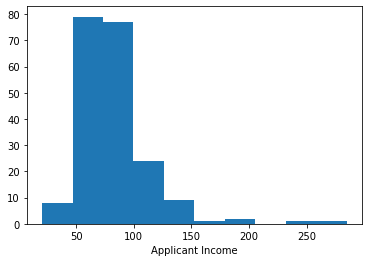

In [105]:
x= np.sqrt(ndf1.ApplicantIncome)
plt.hist(x)
plt.xlabel("Applicant Income")
plt.show()

Cuberoot Transformation

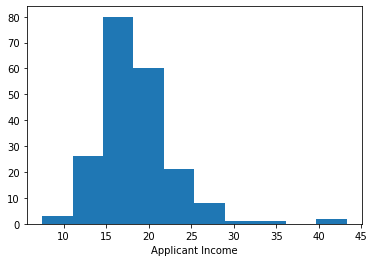

In [106]:
x = np.cbrt(ndf1.ApplicantIncome)
plt.hist(x)
plt.xlabel("Applicant Income")
plt.show()

Reciprocal Transformation

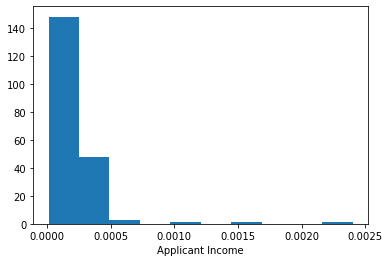

In [107]:
x= np.reciprocal(ndf1.ApplicantIncome)
plt.hist(x)
plt.xlabel("Applicant Income")
plt.show()

Exponentiation Transformation

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: supplied range of [4.639855674272614e+180, inf] is not finite

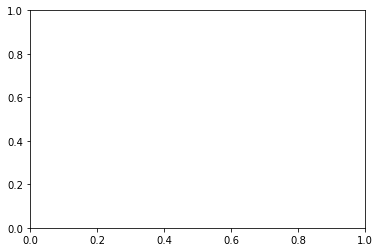

In [108]:
x= np.exp(ndf1.ApplicantIncome)
plt.hist(x)
plt.xlabel("Applicant Income")
plt.show()

For the feature ApplicantIncome, we can use the logarithmic transformation as it makes the ditribution more normal compared to other transformation methods. 

## 4. Feature Scaling

Instructions:


- Use all feature scaling techniques to scale all the numerical features in the given datasets and observe the difference in the scaled features when you use different scaling techniques.


In [117]:
# Write your solution here
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
ndf1 = scaler.fit_transform(ndf)
ndf1 = pd.DataFrame(ndf1, columns = n_ndf.columns)
ndf1

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.070489           0.000000    0.198860          0.743590   
1           0.054830           0.036192    0.172214          0.743590   
2           0.035250           0.000000    0.082489          0.743590   
3           0.030093           0.056592    0.160637          0.743590   
4           0.072356           0.000000    0.191027          0.743590   
..               ...                ...         ...               ...   
609         0.034014           0.000000    0.089725          0.743590   
610         0.048930           0.000000    0.044863          0.358974   
611         0.097984           0.005760    0.353111          0.743590   
612         0.091936           0.000000    0.257598          0.743590   
613         0.054830           0.000000    0.179450          0.743590   

     Credit_History  
0               1.0  
1               1.0  
2               1.0  
3               1.0  
4               1.0  
..              ...  
609             1.0  
610             1.0  
611             1.0  
612             1.0  
613             0.0  

[614 rows x 5 columns]

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ndf2 = scaler.fit_transform(ndf1)
ndf2 = pd.DataFrame(ndf2, columns = n_ndf.columns)
ndf2

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0          -0.271791           0.481382    0.664740          0.241269   
1          -0.563034           0.034600   -0.737736          0.241269   
2          -0.444384          -0.223646   -0.609069          0.241269   
3           0.636308           2.269564    1.719813          0.241269   
4          -0.558508           1.513838   -0.197333          0.241269   
..               ...                ...         ...               ...   
197         0.533437          -0.626594    3.611225          0.241269   
198        -0.518509           0.033544   -0.544735          0.241269   
199        -0.446708          -0.254012   -0.750603          0.241269   
200         0.052967          -0.563221    0.484605          0.241269   
201        -0.006847          -0.626594   -0.364600          0.241269   

     Credit_History  
0          0.453260  
1         -2.422282  
2          0.453260  
3          0.453260  
4          0.453260  
..              ...  
197        0.453260  
198        0.453260  
199        0.453260  
200        0.453260  
201        0.453260  

[202 rows x 5 columns]

## 5. Categorical features


Instructions:


- Get all your categorical data in a new dataframe `cdf`. Refer your last class work on feature engineering on categorical features to make your categorical features ready for tranning machine learning model.

In [111]:
# Write your solution here
df1 = pd.read_csv('loan_train.csv')
categorical_cols =  df.select_dtypes(include = ['object','bool'])
impute = SimpleImputer(strategy='most_frequent')
data = impute.fit_transform(categorical_cols)
cdf1 = pd.DataFrame(data, columns=categorical_cols.columns)
cdf1.drop(columns = 'Loan_ID', inplace =True)
cdf1.isna().sum()


Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [112]:
categorical_columns = ['Gender','Married','Self_Employed']
cdf2= cdf1[categorical_columns]
cdf2 = pd.get_dummies(cdf2)
cdf2


Gender_Female  Gender_Male  Married_No  Married_Yes  Self_Employed_No  \
0                0            1           1            0                 1   
1                0            1           0            1                 1   
2                0            1           0            1                 0   
3                0            1           0            1                 1   
4                0            1           1            0                 1   
..             ...          ...         ...          ...               ...   
609              1            0           1            0                 1   
610              0            1           0            1                 1   
611              0            1           0            1                 1   
612              0            1           0            1                 1   
613              1            0           1            0                 0   

     Self_Employed_Yes  
0                    0  
1                    0  
2                    1  
3                    0  
4                    0  
..                 ...  
609                  0  
610                  0  
611                  0  
612                  0  
613                  1  

[614 rows x 6 columns]

In [113]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
cdf1[['Property_Area','Education']] = oe.fit_transform(cdf1[['Property_Area','Education']])
cdf3 = pd.DataFrame(cdf1)
cdf3

Gender Married Dependents  Education Self_Employed  Property_Area  \
0      Male      No          0        0.0            No            2.0   
1      Male     Yes          1        0.0            No            0.0   
2      Male     Yes          0        0.0           Yes            2.0   
3      Male     Yes          0        1.0            No            2.0   
4      Male      No          0        0.0            No            2.0   
..      ...     ...        ...        ...           ...            ...   
609  Female      No          0        0.0            No            0.0   
610    Male     Yes         3+        0.0            No            0.0   
611    Male     Yes          1        0.0            No            2.0   
612    Male     Yes          2        0.0            No            2.0   
613  Female      No          0        0.0           Yes            1.0   

    Loan_Status  
0             Y  
1             N  
2             Y  
3             Y  
4             Y  
..          ...  
609           Y  
610           Y  
611           Y  
612           Y  
613           N  

[614 rows x 7 columns]

In [114]:
cdf = pd.concat([cdf2,cdf3], axis=1)
cdf.drop(['Gender','Married','Self_Employed'], axis=1, inplace=True)
cdf

Gender_Female  Gender_Male  Married_No  Married_Yes  Self_Employed_No  \
0                0            1           1            0                 1   
1                0            1           0            1                 1   
2                0            1           0            1                 0   
3                0            1           0            1                 1   
4                0            1           1            0                 1   
..             ...          ...         ...          ...               ...   
609              1            0           1            0                 1   
610              0            1           0            1                 1   
611              0            1           0            1                 1   
612              0            1           0            1                 1   
613              1            0           1            0                 0   

     Self_Employed_Yes Dependents  Education  Property_Area Loan_Status  
0                    0          0        0.0            2.0           Y  
1                    0          1        0.0            0.0           N  
2                    1          0        0.0            2.0           Y  
3                    0          0        1.0            2.0           Y  
4                    0          0        0.0            2.0           Y  
..                 ...        ...        ...            ...         ...  
609                  0          0        0.0            0.0           Y  
610                  0         3+        0.0            0.0           Y  
611                  0          1        0.0            2.0           Y  
612                  0          2        0.0            2.0           Y  
613                  1          0        0.0            1.0           N  

[614 rows x 10 columns]

## 6. Combine Features

Instructions:

- Create a new dataframe `alldf` which contains transformed categorical and numerical features ready for traning machine learning model.

In [119]:
#Write your solution here
alldf = pd.concat([cdf, ndf], axis=1)
alldf.head()
alldf.isna().sum()


Gender_Female        0
Gender_Male          0
Married_No           0
Married_Yes          0
Self_Employed_No     0
Self_Employed_Yes    0
Dependents           0
Education            0
Property_Area        0
Loan_Status          0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [120]:
alldf.head()

Gender_Female  Gender_Male  Married_No  Married_Yes  Self_Employed_No  \
0              0            1           1            0                 1   
1              0            1           0            1                 1   
2              0            1           0            1                 0   
3              0            1           0            1                 1   
4              0            1           1            0                 1   

   Self_Employed_Yes Dependents  Education  Property_Area Loan_Status  \
0                  0          0        0.0            2.0           Y   
1                  0          1        0.0            0.0           N   
2                  1          0        0.0            2.0           Y   
3                  0          0        1.0            2.0           Y   
4                  0          0        0.0            2.0           Y   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           5849.0                0.0  146.412162             360.0   
1           4583.0             1508.0  128.000000             360.0   
2           3000.0                0.0   66.000000             360.0   
3           2583.0             2358.0  120.000000             360.0   
4           6000.0                0.0  141.000000             360.0   

   Credit_History  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0

# <center>THANK YOU